# "Изменения продовольственной безопасности в странах Центральной Азии с 2014 по 2017 год"

In [1]:
import pyreadr
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

### Global variables

In [2]:
fAdMod_Sev = 0
fAdSev = 0
popAdSev = 0
popAdMod_Sev = 0
populationAd = 0

fChildMod_Sev, popChildMod_Sev = 0, 0
fChildSev, popChildSev, populationChild = 0, 0, 0
fTotalModSev, fTotalSev = 0, 0
popTotalModSev, popTotalSev = 0, 0

centralAsiaDataFramesArray = []
centralAsia = None

foodTotalModSevDict = {}

### Formulas to calculate Adults food insecure.

In [3]:
def popAdMod_SevFunc(dataframe, fAdultModSev):
    global popAdMod_Sev, popAdMod_Sev
    population = dataframe["N_adults"].astype("int").sum()
    popAdMod_Sev = fAdultModSev * population
    print(f"Pop AdultModSev = {popAdMod_Sev}")
    return popAdMod_Sev

In [4]:
def popAdSevFunc(dataframe, fAdultSev):
    global populationAd
    populationAd = dataframe["N_adults"].astype("int").sum()
    popSev = fAdultSev * populationAd
    print(f"Pop AdultSev = {popSev}")
    return popSev

In [5]:
def calculateAdultFoodAtModAndSev(dataframe):
    global fAdMod_Sev
    dataframe["Prob_Mod_Sev"].fillna(dataframe["Prob_Mod_Sev"].notnull().astype("float").mean(), inplace=True)
    dataframe["wt"].fillna(dataframe["wt"].notnull().astype("float").mean(), inplace=True)

    fAdMod_Sev = (dataframe["Prob_Mod_Sev"].astype("float") *
                 dataframe["wt"].astype("float")).sum() / dataframe["wt"].astype("float").sum()
    print(f"F AdultModSev = {fAdMod_Sev}")
    popAdMod_SevFunc(dataframe, fAdMod_Sev)
    return dataframe

In [6]:
def calculateAdultFoodAtSev(dataframe):
    global fAdSev
    dataframe["Prob_sev"].fillna(dataframe["Prob_sev"].notnull().astype("float").mean(), inplace=True)
    dataframe["wt"].fillna(dataframe["wt"].notnull().astype("float").mean(), inplace=True)

    fAdSev = (dataframe["Prob_sev"].astype("float") *
              dataframe["wt"].astype("float")).sum() / dataframe["wt"].astype("float").sum()

    print(f"F AdultSev = {fAdSev}")
    pop = popAdSevFunc(dataframe, fAdSev)
    return dataframe

### Formulas to calculate Child food insecure.

In [7]:
def calculateChildrenWeight(dataframe):
    dataframe["N_child"] = np.where((dataframe.N_child == "10+"), 10, dataframe.N_child)
    dataframe["N_adults"] = np.where((dataframe.N_adults == "10+"), 10, dataframe.N_adults)

    dataframe["N_child"] = np.where((dataframe.N_child == ""), 0, dataframe.N_child)
    dataframe["N_adults"] = np.where((dataframe.N_adults == ""), 0, dataframe.N_adults)

    dataframe["N_child"].fillna(dataframe["N_child"].notnull().astype("float").mean(), inplace=True)
    dataframe["N_adults"].fillna(dataframe["N_child"].notnull().astype("float").mean(), inplace=True)

    dataframe["Wt_child"] = (dataframe["wt"] /
                             dataframe["N_adults"].astype("float")) * dataframe["N_child"].astype("float")
    return dataframe

In [8]:
def popChildMod_SevFunc(dataframe, fChildModSev):
    global populationChild, popChildMod_Sev
    populationChild = dataframe["N_child"].astype("int").sum()
    popChildMod_Sev = fChildModSev * populationChild
    print(f"Pop ChildModSev = {popChildMod_Sev}")
    return popChildMod_Sev

In [9]:
def popChildSevFunc(dataframe, fChildSev):
    global popChildSev
    population = dataframe["N_child"].astype("int").sum()
    popChildSev = fChildSev * population
    print(f"Pop ChildModSev = {popChildSev}")
    return popChildSev

In [10]:
def calculateChildFoodAtMod_Sev(dataframe):
    global fChildMod_Sev
    dataframe["Prob_Mod_Sev"].fillna(dataframe["Prob_Mod_Sev"].notnull().astype("float").mean(), inplace=True)
    dataframe["Wt_child"].fillna(dataframe["Wt_child"].notnull().astype("float").mean(), inplace=True)

    fChildMod_Sev = (dataframe["Prob_Mod_Sev"].astype("float") *
                    dataframe["Wt_child"].astype("float")).sum() / dataframe["Wt_child"].astype("float").sum()
    print(f"F childModSev = {fChildMod_Sev}")
    popChildMod_SevFunc(dataframe, fChildMod_Sev)
    return dataframe

In [11]:
def calculateChildFoodAtSev(dataframe):
    global fChildSev
    dataframe["Prob_sev"].fillna(dataframe["Prob_sev"].notnull().astype("float").mean(), inplace=True)
    dataframe["Wt_child"].fillna(dataframe["Wt_child"].notnull().astype("float").mean(), inplace=True)

    fChildSev = (dataframe["Prob_sev"].astype("float") *
                 dataframe["Wt_child"].astype("float")).sum() / dataframe["Wt_child"].astype("float").sum()

    print(f"F childSev = {fChildSev}")
    popChildSevFunc(dataframe, fChildSev)
    return dataframe

### Total food insecure.

In [12]:
def totalMod_SevFunc(popAdMod_Sev, popChildMod_Sev, popAdult, popChild):
    total = (popAdMod_Sev + popChildMod_Sev) / (popAdult + popChild)
    print(f"Total Mod_Sev = {total}")
    return total

In [13]:
def totalSevFunc(popAdSev, popChildSev, popAdult, popChild):
    total = (popAdSev + popChildSev) / (popAdult + popChild)
    print(f"Total Sev = {total}")
    return total

In [14]:
def popTotalMod_SevFunc(fToal, popTotal):
    total = fToal * popTotal
    print(f'Pop Total Mod_SEV = {total}')
    return total

In [15]:
def popTotalSevFunc(fToal, popTotal):
    total = fToal * popTotal
    print(f'Pop Total SEV = {total}')
    return total

### Add year and country column.

In [16]:
def addYears(dataframe, dir):
    year = dir.split("_")[-1]
    country = dir.replace('/', '_').split('_')[-2]

    dataframe["year"] = year
    dataframe["country"] = country
    if country not in foodTotalModSevDict:
        foodTotalModSevDict[country] = {}
    return dataframe, country, year

### Main cycle.

In [17]:
path = 'Lab5'
for dir, folder, files in os.walk(path):
    for file in files:
        if file[-1:-6:-1][::-1] == "RData":
            dataFrame = None
            try:
                result = pyreadr.read_r(f'{dir}/{file}')["data"]
                dataFrame = pandas.DataFrame(result)
            except pyreadr.custom_errors.LibrdataError as e:

                file_path = f'{dir}/{file}'.split(".")
                dataFrame = pandas.read_stata(file_path[0]+".dta")

            print("")
            print(dir)

            dataFrame, country, year = addYears(dataFrame, dir)

            dataFrame = calculateChildrenWeight(dataFrame)

            dataFrame = calculateAdultFoodAtModAndSev(dataFrame)
            dataFrame = calculateAdultFoodAtSev(dataFrame)

            dataFrame = calculateChildFoodAtMod_Sev(dataFrame)
            dataFrame = calculateChildFoodAtSev(dataFrame)

            fTotalModSev = totalMod_SevFunc(popAdMod_Sev, popChildMod_Sev, populationAd, populationChild)
            fTotalSev = totalSevFunc(popAdSev, popChildSev, populationAd, populationChild)

            popTotalModSev = popTotalMod_SevFunc(fTotalModSev, populationAd+populationChild)
            popTotalSev = popTotalSevFunc(fTotalSev, populationAd+populationChild)

            centralAsiaDataFramesArray.append(dataFrame)

            foodTotalModSevDict[country].update({int(year): fTotalModSev})

            with pandas.ExcelWriter(f'{dir}/{file[0:-6]}.xlsx') as writer:
                dataFrame.to_excel(writer)


Lab5/KGZ_2015
F AdultModSev = 0.25450719076333794
Pop AdultModSev = 751.5597343241369
F AdultSev = 0.08826532543116555
Pop AdultSev = 260.6475059982319
F childModSev = 0.28286003567985013
Pop ChildModSev = 481.71064076278475
F childSev = 0.1007322374659121
Pop ChildModSev = 171.5470004044483
Total Mod_Sev = 0.26487765787949347
Total Sev = 0.036844287028446804
Pop Total Mod_SEV = 1233.2703750869216
Pop Total SEV = 171.5470004044483

Lab5/KGZ_2014
F AdultModSev = 0.2686160855334666
Pop AdultModSev = 754.5425842635077
F AdultSev = 0.12309877508300224
Pop AdultSev = 345.7844592081533
F childModSev = 0.2848776580675904
Pop ChildModSev = 435.29306152727816
F childSev = 0.11989084946798746
Pop ChildModSev = 183.19321798708484
Total Mod_Sev = 0.27434531837463355
Total Sev = 0.042239616782818734
Pop Total Mod_SEV = 1189.8356457907857
Pop Total SEV = 183.19321798708484

Lab5/TAIJ_2017
F AdultModSev = 0.42703399329423214
Pop AdultModSev = 1277.6857079363426
F AdultSev = 0.2668375185164021
Pop Ad

### Merge all countries to one excel file.

In [18]:
centralAsia = pandas.concat(centralAsiaDataFramesArray)
centralAsia.reset_index(drop=True, inplace=True)

with pandas.ExcelWriter(f'CentralAsia.xlsx') as writer:
    centralAsia.to_excel(writer)

for i in foodTotalModSevDict:
    values = []
    years = [2014, 2015, 2016, 2017]
    for z in years:
        values.append(foodTotalModSevDict[i][z]*100)
    foodTotalModSevDict[i] = values

### Graphics of food insecure for each Central Asia country.

In [19]:
# Countryies
for i in foodTotalModSevDict:
    style.use('ggplot')
    x = [2014, 2015, 2016, 2017]
    y = foodTotalModSevDict[i]
    plt.plot(x, y, 'r', label=i, linewidth=5)
    plt.title(i)
    plt.savefig(f'{i}.png', bbox_inches='tight')
    plt.close()


### Central Asia food insecure graphic.

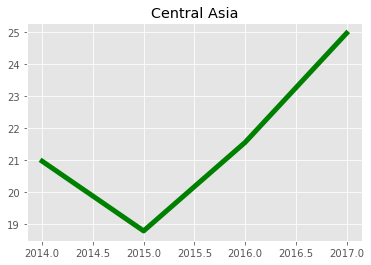

In [20]:
# Сentral Asia
dfArray = pandas.DataFrame(foodTotalModSevDict).T
_2014 = dfArray[0].mean()
_2015 = dfArray[1].mean()
_2016 = dfArray[2].mean()
_2017 = dfArray[3].mean()

style.use('ggplot')
x = [2014, 2015, 2016, 2017]
y = [_2014, _2015, _2016, _2017]
plt.plot(x, y, 'g', label="Central Asia", linewidth=5)
plt.title("Central Asia")
plt.savefig('Central Asia.png', bbox_inches='tight')
plt.show()
plt.close()